In [110]:
#Linear Regression
import time
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.animation as animation
plt.rcParams['animation.html'] = 'jshtml'
%matplotlib inline

In [83]:
def gradient(X,Y,theta):
    #print(X.shape)
    #print(Y.shape)
    #print(theta.shape)
    return ((np.matmul(X.T,(np.matmul(X,theta)-Y))))/(X.shape[0])

def loss(X,Y,theta):
    return np.square(np.linalg.norm(Y -np.matmul(X,theta)))/(2*X.shape[0])

def gradDescent(X,Y,batch_size = 1, lr = 0.05, stopThresh = 1e-15):

    #shape converted from (tot_examples,dim) -> (num_batches,batch_size,dim) s.t. num_batches*batch_size = tot_examples
    theta = np.array([[0],[0]])
    X = np.concatenate([np.ones(Y.shape[0]).reshape(Y.shape[0],1),X],axis = 1)
    curr_loss = 1; prev_loss = 0
    epochs = 0
    t = time.time()
    thetaMov = [(theta[0][0],theta[1][0],loss(X,Y,theta))]
    while abs(curr_loss-prev_loss)>stopThresh:
        net_loss = 0
        Y = Y.reshape(Y.shape[0],1)
        theta = theta - lr*gradient(X,Y,theta)
        lossVal =  loss(X,Y,theta)
        thetaMov.append((theta[0][0],theta[1][0],lossVal))
        prev_loss = curr_loss
        curr_loss = lossVal
        epochs += 1
    print(time.time()-t)
    print(epochs)
    return theta,np.array(thetaMov)

In [112]:
theta, mov = gradDescent(trainX,trainY)

0.013286113739013672
309


In [18]:
class LinearRegression :

    def __init__(self,trainX, trainY, learning_rate = 0.01):
        #trainX as a matrix of dimensions : number_examples X num_features(without bias)
        #trainY as a matrix of dimesnion : number_example X 1

        self.trainX = np.concatenate([np.ones(trainX.shape[0]).reshape(trainX.shape[0],1),(trainX),],axis = 1)
        self.trainY = trainY

        self.trainXMean = np.mean(trainX)
        self.trainYMean = np.mean(trainY)
        self.trainXstd = np.std(trainX)
        self.trainYstd = np.std(trainY)
        
        self.n_features =  trainX.shape[1]
        self.nExamples = trainX.shape[0]
        self.lr = learning_rate
        self.iters = 0

        self.theta = np.zeros((1,self.n_features+1)).T
        self.thetas = [(self.theta[0][0],self.theta[1][0],self.loss())]

    def loss(self):
            return  np.square(np.linalg.norm(self.trainY -np.matmul(self.trainX,self.theta)))/(2*self.nExamples)

    def BatchGrad(self,stoppingThresh = 1e-12):
        t = time.time()
        #stopping criteria : 1 
        loss0 = 0
        loss = self.loss()
        while abs(loss - loss0) > stoppingThresh:
            loss0 = loss
            self.iters+=1
            self.theta = self.theta + self.lr*(np.sum((self.trainY -np.matmul(self.trainX,self.theta))*self.trainX,axis  = 0).reshape(1,len(self.theta)).T)
            loss = self.loss()
            self.thetas.append((self.theta[0][0],self.theta[1][0],loss))
        
        print(f"Training finished in {time.time()-t} ms")

In [19]:
def loadData(path):
    return np.loadtxt(path)

def normalizeData(x):
    return (x-np.mean(x))/np.std(x)

In [20]:
trainX = normalizeData(loadData('data/q1/linearX.csv'))
trainY = (loadData('data/q1/linearY.csv'))
trainX = trainX.reshape(len(trainX),1)
trainY = trainY.reshape(len(trainY),1)

In [23]:
model = LinearRegression(trainX,trainY)
model.lr = 0.001
model.BatchGrad(stoppingThresh=1e-15)
theta1 = model.theta
theta1

Training finished in 0.009828805923461914 ms


array([[0.99662001],
       [0.0013402 ]])

In [65]:
X = np.concatenate([np.ones(trainY.shape[0]).reshape(trainY.shape[0],1),trainX],axis = 1)

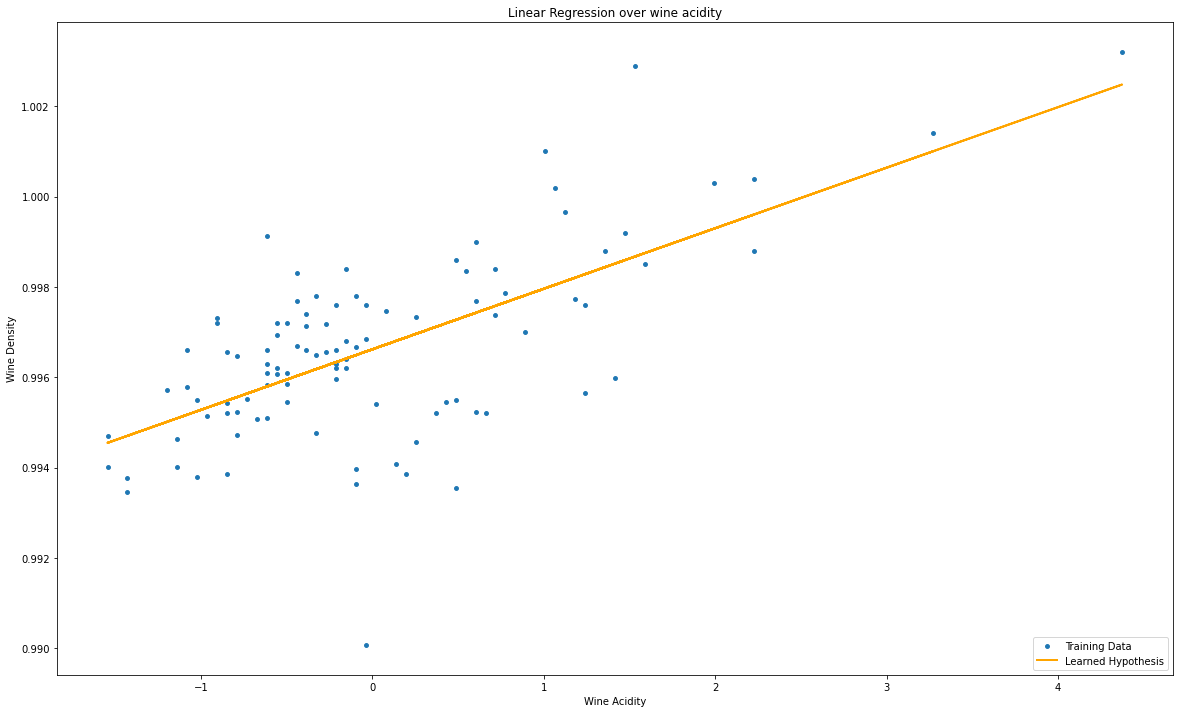

In [71]:
plt.figure(figsize=(20,12))
ax = plt.axes()
ax.set_facecolor('white')
plt.scatter(trainX,trainY,s = 15,label = "Training Data")
plt.plot(trainX,np.matmul(X,theta).reshape(len(model.trainX)),linewidth = 2,label = "Learned Hypothesis",c = 'orange')
plt.legend(loc = "lower right")
plt.xlabel('Wine Acidity')
plt.ylabel('Wine Density')
plt.title("Linear Regression over wine acidity")
plt.savefig('images/Q1linearRegressionHypothesis.png')
plt.show()

In [96]:
t1,t2 = np.meshgrid(np.linspace(-0.2,2,200),np.linspace(-1.2,1.2,200))
def costFunc(theta):
    return  np.square(np.linalg.norm(model.trainY -np.matmul(model.trainX,theta)))/(2*model.nExamples)
J = np.apply_along_axis(
        lambda theta: costFunc( np.reshape(theta, (-1, 1))),
        2, np.stack([t1, t2], axis=-1))

(310, 3)


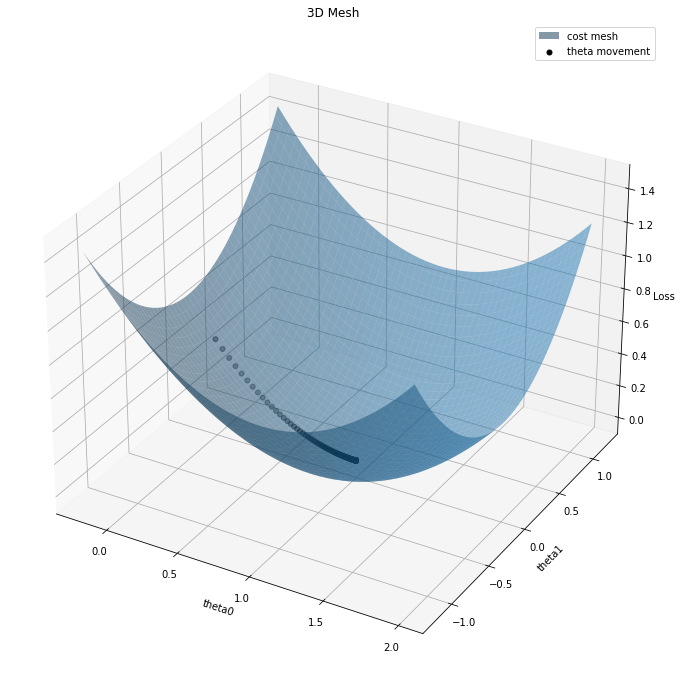

In [113]:
#plotting for saving
theta0, theta1, J = t1,t2,J
fig = plt.figure(figsize=(20,12))
axes = fig.add_subplot(title='3D Mesh', projection='3d', xlabel='theta0', ylabel='theta1', zlabel='Loss')
surface = axes.plot_surface(theta0, theta1, J, label='cost mesh', alpha=0.5)
surface._facecolors2d = surface._facecolor3d
surface._edgecolors2d = surface._edgecolor3d
print(mov.shape)
axes.scatter(mov[:,0], mov[:,1], mov[:,2], marker='o', c='k', s=25,label = 'theta movement')
axes.legend()
fig.savefig('c.png')
plt.show()
plt.close()

In [130]:
mov[0:10,2].reshape(10,1)

array([[0.4966279 ],
       [0.4482068 ],
       [0.40450675],
       [0.36506746],
       [0.3294735 ],
       [0.29734995],
       [0.26835845],
       [0.24219362],
       [0.21857985],
       [0.19726843]])

(310, 3)


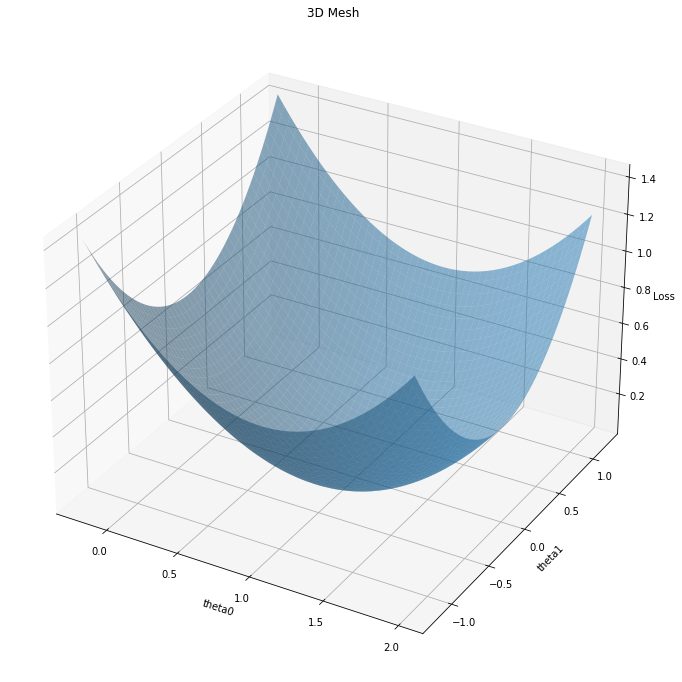

(<mpl_toolkits.mplot3d.art3d.Line3D at 0x1254847f0>,)

In [114]:
theta0, theta1, J = t1,t2,J
fig = plt.figure(figsize=(20,12))
axes = fig.add_subplot(title='3D Mesh', projection='3d', xlabel='theta0', ylabel='theta1', zlabel='Loss')
surface = axes.plot_surface(theta0, theta1, J, label='cost mesh', alpha=0.5)
surface._facecolors2d = surface._facecolor3d
surface._edgecolors2d = surface._edgecolor3d
print(mov.shape)
fig.savefig('c.png')
learn, = axes.plot([], [], [], color='red', label='learning theta')
fig.tight_layout()
def update(iteration):
        learn.set_data(mov[:2, :iteration+1])
        learn.set_3d_properties(mov[2, :iteration+1])
        return learn,
anim = animation.FuncAnimation(fig, update,
                                   frames=range(mov.shape[1]),
                                   interval=200, blit=True)
plt.show()

for i in 

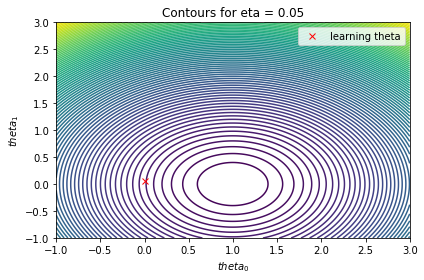

In [72]:
fig_d, axes_d = plt.subplots()
axes_d.set_title('Contours for eta = ' + str(0.05))
axes_d.set_xlabel('$theta_0$')
axes_d.set_ylabel('$theta_1$')
axes_d.contour(theta0, theta1, J, 100)
learn, = axes_d.plot([], [], color='red', marker='x',
                         linestyle='None', label='learning theta')
axes_d.legend()
fig_d.tight_layout()

def update(iteration):
        learn.set_data(mov[:2, :iteration+1])
        return learn,
anim = animation.FuncAnimation(fig_d, update,
                                   frames=range(mov.shape[1]),
                                   interval=200, blit=True)
plt.show()
fig_d.savefig("d.png")
plt.close()